# FIGURE 4 - CURRENT FLOW INTO COMPARTMENT

## IMPORTS

In [1]:
try:
        
    import h5py
    
    from ipywidgets import widgets, Layout, interact, interactive, interactive_output, Dropdown
    from IPython.display import display
    import matplotlib.pyplot as mplt
    import scipy
    from sympy import symbols, Eq, solve
    import numpy as np
    import random
    import seaborn as sns 
    import pandas as pd
    import graphing as gr
    #!pip install viola
    ########## Modules required for artist drawing on matplotlib
    import matplotlib.path as mpath
    import matplotlib.lines as mlines
    import matplotlib.patches as mpatches
    from matplotlib.collections import PatchCollection
    
      
except ModuleNotFoundError:
        print("A class you are trying to import is not present in the directory")
    
except Exception:
        print("Something went wrong - modules have not been imported")

else: 
    print("All relevant classes imported")

All relevant classes imported


## SELECT FILE

In [52]:
#######################################################
#### GUI 

edt_filename = widgets.Text(description = 'File name', value='Experiment-H4')
btn_select = widgets.Button(description = 'Select file',button_style='success')
output_file = widgets.Output()

display(edt_filename, btn_select,output_file)



#######################################################
#### FUNCTIONS


#df_flux = pd.DataFrame({'Compartment':[],'Na_net':[], 'Na_leak':[],'Na_Atpase':[], 'K_net':[],'K_leak':[],'K_Atpase':[],'K_kcc2':[], 'Cl_net':[],'Cl_kcc2':[],'X':[],'z':[]  })
df_ed = pd.DataFrame({'Boundary':[],'Na':[],'K':[],'Cl':[]})



def btn_select_clicked(b):
    global file_name, df_end, df_start, df_end_flux, df_end_ed, df_end_net_flux
    file_name = "\\"
    file_name = file_name + edt_filename.value 
    
    try: 
        with h5py.File(file_name, mode='r') as hdf:
            
            print("File found and content loaded into memory")
            global C, comp_names_arr, intervals, interval_arr, master_arr, t_arr, ED_master_arr,E_group_arr
            C = hdf.get('COMPARTMENTS')
            C_group_arr =[]
            t_arr_bool = True
            comp_names_arr= list(C.keys())
                        
            C1 = C.get(comp_names_arr[0])
            
            T = hdf.get('TIMING')
            total_t = T.get('TOTAL_T')[()]
            intervals = T.get('INTERVALS')[()]
            dt = T.get("DT")[()]
            total_steps = total_t /dt          
            interval_step = total_steps / intervals
            interval_arr = [round(interval_step * i) for i in range(intervals)]
            
            master_arr = []
            t_arr =[]
            
            
            
            
            ##### LOADING COMPARTMENT DATA
            for e in range(len(comp_names_arr)):
                C_group = C.get(comp_names_arr[e])
                C_group_arr.append(C_group)
               
                data_arr_2 =[]
                for j in range(len(list(C_group.keys()))):
                    dataset = C_group.get(str(interval_arr[j]))
                    
                    data_arr = []
                    for d in range(len(list(dataset))):
                        data_arr.append(dataset[d])
                    
                    data_arr_2.append(data_arr)
            
                    if t_arr_bool == True:
                        t_arr.append(data_arr[0])         
                
                master_arr.append(data_arr_2)
                t_arr_bool = False
                
            
            #df_start['radius'] = 
            
            E = hdf.get('ELECTRODIFFUSION')
            E_group_arr = list(E.keys())
            ED_master_arr = []            
            
            ##### LOADING ELECTRODIFFUSION DATA
            for x in range(len(E_group_arr)): # Looping through the electrodiffusion groups on the file
                
                E_group = E.get(E_group_arr[x])
                
                ED_data_arr =[] #stores the electrodiffusion data for a group
                
                for y in range(len(list(E_group.keys()))-1): # Looping through all the datasets of the group
                    
                    dataset = E_group.get(str(interval_arr[y+1]))
                   
                    ED_data_arr_2 = [] #stores the dataset values for one dataset
                    for z in range(len(list(dataset))): # Looping through the individual datasets to extract data
                        ED_data_arr_2.append(dataset[z])
                    
                    
                    ED_data_arr.append(ED_data_arr_2) 
                    
            
                ED_master_arr.append(ED_data_arr) #contains all the electrodiffusion data for all the groups (1st index is the group, 2nd index is the interval)
            
      
            
    except: 
        raise("File not found")
        raise("File needs to be in base directory")


btn_select.on_click(btn_select_clicked)

Text(value='Experiment-H4', description='File name')

Button(button_style='success', description='Select file', style=ButtonStyle())

Output()

File found and content loaded into memory


## 4a - Current Amplitudes and shapes

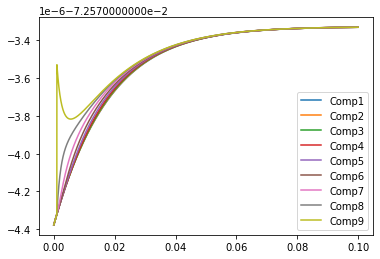

In [53]:
for j in range(len(master_arr)):
    v_arr = [master_arr[j][i][-3] for i in range(len(t_arr))]
    #print(str(j) +' of '+str(len(master_arr)+' loaded'))
    mplt.plot(t_arr[:],v_arr[:], label= comp_names_arr[j])

mplt.legend()

Button(button_style='success', description='Plot 4A', style=ButtonStyle())

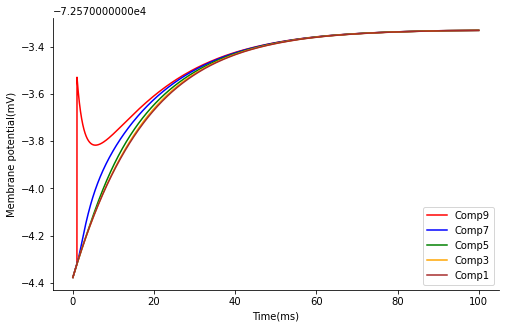

In [56]:
######
btn_plot_4a = widgets.Button(description="Plot 4A", button_style='success')
display(btn_plot_4a)
#####



def btn_plot_4a_clicked(b):
    
 
    f4a, ax_1 = mplt.subplots(1,1,figsize=(8,5), sharex=True,sharey=True) 
    #f4a.tight_layout(pad=4.0)

    t2_arr = [t_arr[j]*1e3 for j in range(len(t_arr))]
    v_arr = [master_arr[8][j][-3]*1e6 for j in range(len(master_arr[0]))]
    ax_1.plot(t2_arr, v_arr, label="Comp9",color='r')
    v_arr = [master_arr[6][j][-3]*1e6 for j in range(len(master_arr[0]))]
    ax_1.plot(t2_arr, v_arr,label = "Comp7",color='b')
    v_arr = [master_arr[4][j][-3]*1e6 for j in range(len(master_arr[0]))]
    ax_1.plot(t2_arr, v_arr, label = "Comp5",color='g')
    v_arr = [master_arr[2][j][-3]*1e6 for j in range(len(master_arr[0]))]
    ax_1.plot(t2_arr, v_arr, label = "Comp3",color='orange')
    v_arr = [master_arr[0][j][-3]*1e6 for j in range(len(master_arr[0]))]
    ax_1.plot(t2_arr, v_arr, label = "Comp1",color='brown')
    ax_1.legend()
    ax_1.set_xlabel("Time(ms)")
    ax_1.set_ylabel("Membrane potential(mV)")  
    
     
    
    sns.despine()
 
    
#####
btn_plot_4a.on_click(btn_plot_4a_clicked)

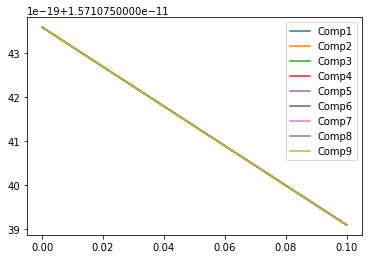

In [57]:
for j in range(len(master_arr)):
    w_arr = [master_arr[j][i][3] for i in range(len(t_arr))]
    #print(str(j) +' of '+str(len(master_arr)+' loaded'))
    mplt.plot(t_arr[:],w_arr[:], label= comp_names_arr[j])

mplt.legend()

Button(button_style='success', description='Plot 4B', style=ButtonStyle())

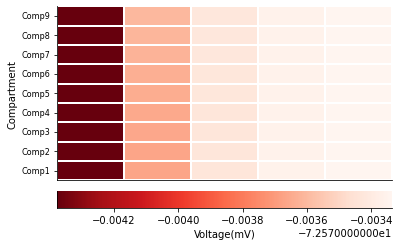

In [58]:
######
btn_plot_4b = widgets.Button(description="Plot 4B", button_style='success')
display(btn_plot_4b)
#####
vm_arr =[]


def btn_plot_4b_clicked(b):

    for i in range(len(comp_names_arr),0,-1):
        
        temp_arr_vm = [master_arr[i-1][j][-3]*1e3 for j in range(len(master_arr[0]))] 
        temp_arr_vm = temp_arr_vm[:25000:1000]
        vm_arr.append(temp_arr_vm)

 
    g_vm = sns.heatmap(vm_arr,cmap="Reds_r",xticklabels=False,  cbar_kws={'pad':0.05,'label':'Voltage(mV)', 'orientation':'horizontal' },linewidth=0.01 )
    g_vm.set_ylabel("Compartment",fontsize=10)
    g_vm.set_yticklabels(comp_names_arr[::-1], fontsize=8, rotation=0)
    #left_ax_vm.set_title("Vm in each compartment",fontsize=10)    
    
    
    sns.despine()
#####
btn_plot_4b.on_click(btn_plot_4b_clicked)

## Time constant


4999
Vmax: -72.57333030867609mV
Time of Vmax: 0.09998000000007932s
---------
Vmin: -72.57333030867609mV
Time of Vmin: 0.09998000000007932s
---------
4999
Vtau: -72.57333030867609mV
Time of Vtau: 0.09998000000007932s
---------
---------
Tau = 0.0ms
---------
---------


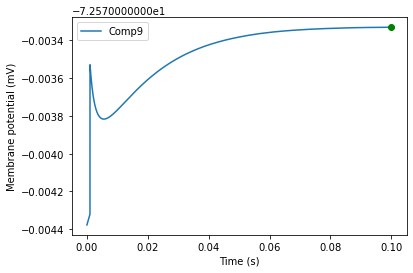

In [59]:
v_arr = [master_arr[8][i][-3]*1e3 for i in range(len(t_arr))]
mplt.plot(t_arr[:],v_arr[:], label= comp_names_arr[8])
mplt.ylabel("Membrane potential (mV)")
mplt.xlabel("Time (s)")
mplt.legend()
global vmax_index, vmax, vtau,tau

vmax = v_arr[0]
vmin = v_arr[-1]
vmax_index = 0
vmin_index = -1


for i in range(len(v_arr)):
    if vmax<v_arr[i]:
        vmax = v_arr[i]
        vmax_index = i
    if i>2000 and round(vmin,1)>round(v_arr[i],1): 
        vmin = v_arr[i]
        vmin_index = i

print(vmax_index)
print("Vmax: " + str(vmax) +"mV")
print("Time of Vmax: " + str(t_arr[vmax_index]) + "s")
print("---------")
print("Vmin: " + str(vmin) +"mV")
print("Time of Vmin: " + str(t_arr[vmin_index]) + "s")
print("---------")

vdiff = vmax-vmin
vtau = vmax - 0.63*(vdiff)
vtau_index = 0


for j in range(len(v_arr)):
    if (j>1000) and (round(v_arr[j],2) == round(vtau,2)):
        vtau_index = j
        
print(vtau_index)

print("Vtau: " + str(vtau) +"mV")
print("Time of Vtau: " + str(t_arr[vtau_index]) + "s")

tau = t_arr[vtau_index] - t_arr[vmax_index]

mplt.plot(t_arr[vtau_index], vtau,'go')

print("---------")
print("---------")
print("Tau = " + str(tau*1e3) +"ms")
print("---------")
print("---------")

## Length constant

[3.09036660425914, 5.86115950529704]
--------
Line of Best fit: y = 0.147(logx)^2 -1.313(logx) -69.667
--------
Vmax: -71.9mV
V-lambda: -72.32mV
---------
Length constant: 21.9851um


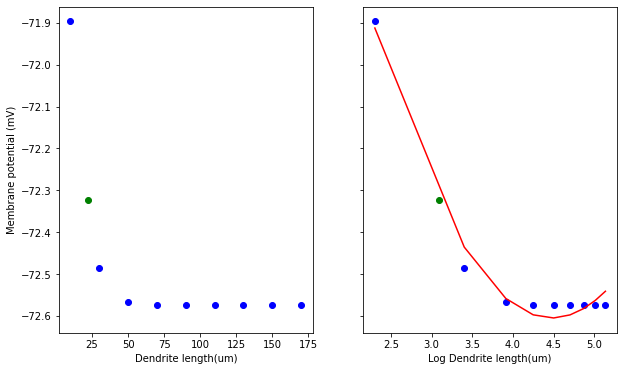

In [42]:
v_arr = []
len_arr = [10,30,50,70,90,110,130,150,170]

global x_lambda

for i in range(len(comp_names_arr),0,-1):
    v_arr.append(master_arr[i-1][vmax_index][-3]*1e3)

v_diff = v_arr[0]-v_arr[8]
v_lambda = v_arr[0] -0.63*v_diff


x_data = np.array(len_arr)
y_data = np.array(v_arr)
log_x_data = np.log(x_data)
#log_y_data=np.log(y_data)
[a,b,c] = np.polyfit(log_x_data, y_data, 2)
y_bestfit = a * (log_x_data**2) + b*log_x_data +c


f_lenconstant, [ax_1,ax_2] = mplt.subplots(1,2,figsize=(10,6), sharex=False,sharey=True) 

ax_1.plot(len_arr,v_arr,"bo",)
ax_1.set_ylabel("Membrane potential (mV)")
ax_1.set_xlabel("Dendrite length(um)")

ax_2.plot(log_x_data, y_data,'bo')
ax_2.plot(log_x_data, y_bestfit,'r')
ax_2.set_xlabel("Log Dendrite length(um)")

x = symbols('x')
eq1 = Eq(a * (x)**2 + b*x +c,v_lambda)
sol = solve(eq1)
print(sol)
log_x_lambda = float(sol[0])
x_lambda = np.exp(log_x_lambda)

ax_1.plot(x_lambda, v_lambda,'go')
ax_2.plot(log_x_lambda, v_lambda,'go')

print('--------')
print('Line of Best fit: y = '+str(round(a,3))+'(logx)^2 ' + str(round(b,3))+'(logx) '+str(round(c,3)))
print('--------')
print("Vmax: " + str(round(vmax,2)) +"mV")
print("V-lambda: " + str(round(v_lambda,2)) +"mV")
print("---------")
print("Length constant: " + str(round(x_lambda,4)) + 'um')

## Passive Neuron Properties


In [9]:
cm = 2*1e-6 #F/cm2

# tau = cm * rm
rm = tau/cm

diam = 1 #1um
diam = diam*1e-4 #cm

ri = symbols("ri")
eq2 = Eq( ((rm)/(ri))**0.5 , x_lambda*1e-4)
sol = solve(eq2)
ri = float(sol[0])

print('---------------------------')
print('PASSIVE NEURON PROPERTIES')
print('---------------------------')
print("Lambda (Length constant): " + str(round(x_lambda,2))+" um")
print("Tau (time constant): " + str(round(tau*1e3,2))+" ms")
print("Cm: " + str(cm*1e6)+" uF/cm2 --> Default")
print("Rm: " + str(round(rm,2))+" ohm.cm2 --> Calculated via time constant")
print("Ri: " + str(round(ri,2))+ ' ohm.cm --> Calculated via length constant')

---------------------------
PASSIVE NEURON PROPERTIES
---------------------------
Lambda (Length constant): 77.51 um
Tau (time constant): 8.87 ms
Cm: 2.0 uF/cm2 --> Default
Rm: 4435.0 ohm.cm2 --> Calculated via time constant
Ri: 73811883.86 ohm.cm --> Calculated via length constant
